In [ ]:
import os
import numpy as np
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import *


In [ ]:
import matplotlib.pyplot as plt
import random
from glob import glob
%matplotlib inline

**Data Loading**

In [ ]:
base_dir = os.path.join(os.getcwd(), '/content/drive/MyDrive/WISE_ML_3-2/data')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [ ]:
train_notes_dir = os.path.join(train_dir, 'notesImages')  # directory with our training cat pictures
train_other_dir = os.path.join(train_dir, 'other')
validation_notes_dir = os.path.join(validation_dir, 'notesImages')  # directory with our validation cat pictures
validation_other_dir = os.path.join(validation_dir, 'other')

In [ ]:
num_notes_tr = len(os.listdir(train_notes_dir))
num_others_tr = len(os.listdir(train_other_dir))

num_notes_val = len(os.listdir(validation_notes_dir))
num_others_val = len(os.listdir(validation_other_dir))

total_train = num_notes_tr + num_others_tr
total_val = num_others_tr + num_others_val
total_train

128

In [ ]:
total_val

128

In [ ]:
# Initialising the CNN 
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape=(124, 124, 3)))
model.add(Activation('relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 1 & 2 with more hidden layers
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
# Step 3 - Dropout
model.add(Dropout(0.5))

# Step 4 - Flattening
model.add(Flatten()) 

# Step 5 - Full connection
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compiling the CNN
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 59, 59, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        1

In [ ]:
model.load_weights('/content/drive/MyDrive/WISE_ML_3-2/weights.h5')


**Data Augmentation and Preparation**

In [ ]:
batch_size = 32
IMG_SHAPE  = 124
# data augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,    
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,  
        target_size=(IMG_SHAPE,IMG_SHAPE),  
        batch_size=batch_size,
        class_mode='binary')  

Found 128 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255,    
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
validation_set = validation_datagen.flow_from_directory(batch_size=batch_size,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                        class_mode='binary')

Found 64 images belonging to 2 classes.


In [ ]:

def predict(file_path):
  
    img = load_img(file_path, target_size=(124, 124, 3))
    x = img_to_array(img) / 255. 
    y = model.predict(np.expand_dims(x, axis=0))
    return np.squeeze(y) > 0.5

In [ ]:
if not os.path.exists('/content/drive/MyDrive/WISE_ML_3-2/notes'):
    os.mkdir('/content/drive/MyDrive/WISE_ML_3-2/notes')

In [ ]:
files = glob('/content/drive/MyDrive/WISE_ML_3-2/validate/*.*')

for file_path in files:
    if predict(file_path): 
        file_name = file_path.split('/')[-1] 
        os.rename(file_path, '/content/drive/MyDrive/WISE_ML_3-2/notes/' + file_name) 

In [ ]:
epochs=5
history = model.fit_generator(
        train_generator,
        steps_per_epoch= (total_train) // (batch_size),
        epochs=epochs,
        validation_data=validation_set,
        validation_steps= total_val // batch_size)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
4/4 [==============================] - 17s 4s/step - loss: 2.8577 - accuracy: 0.0490 - val_loss: 1.3391 - val_accuracy: 0.1094
Epoch 2/5
4/4 [==============================] - 7s 2s/step - loss: 1.4597 - accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 8s 2s/step - loss: 0.8955 - accuracy: 0.0417
Epoch 4/5
4/4 [==============================] - 7s 2s/step - loss: 0.7270 - accuracy: 0.4958
Epoch 5/5
4/4 [==============================] - 8s 2s/step - loss: 0.6524 - accuracy: 0.6906


In [ ]:
(total_train) // (batch_size)

4

In [ ]:
total_val // batch_size

4

In [ ]:
model.save_weights('/content/drive/MyDrive/WISE_ML_3-2/weights.h5')


ValueError: ignored

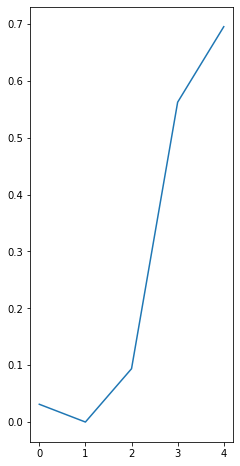

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
acc

In [ ]:
x, y = next(train_generator)
y = y.reshape(len(y), 1)
y_pred = model.predict(x)
y_pred = (y_pred > 0.5) * 1

y == y_pred
